Code for making twitter graphics

In [12]:
import fastf1
import fastf1.plotting as plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1')

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("F1 Tire Degradation Analysis Environment Ready! 🏎️")

F1 Tire Degradation Analysis Environment Ready! 🏎️


In [4]:
race = fastf1.get_session(2025, "Qatar", "Race")
race.load()
ver_laps = race.laps.pick_drivers("VER").pick_quicklaps().reset_index()
pia_laps = race.laps.pick_drivers("PIA").pick_quicklaps().reset_index()
sai_laps = race.laps.pick_drivers("SAI").pick_quicklaps().reset_index()
ant_laps = race.laps.pick_drivers("ANT").pick_quicklaps().reset_index()
nor_laps = race.laps.pick_drivers("NOR").pick_quicklaps().reset_index()

events      WARNING 	Correcting user input 'Qatar' to 'Qatar Grand Prix'
core           INFO 	Loading data for Qatar Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '55', '4', '12', '63', '14', '16', '30', '22', '23', '44', '5', '43', '31', '10', '18', '6', '87

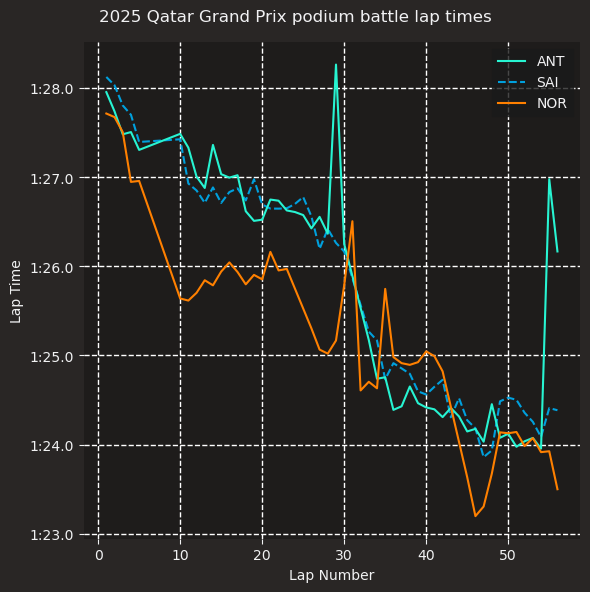

In [49]:
my_styles = [
    # style for each first driver
    {'color': 'auto', 'linewidth': 0},
    # style for each second driver
    {'color': 'auto', 'linewidth': 0}
]
fig, ax = plt.subplots(figsize=(6, 6))

for driver in ('SAI', 'ANT', 'NOR'):
    laps = race.laps.pick_drivers(driver).reset_index()
    laps = laps[laps['IsAccurate'] == True]
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

plt.suptitle("2025 Qatar Grand Prix podium battle lap times")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='both', linestyle='--', linewidth=1)
sns.despine(left=True, bottom=True)
plotting.add_sorted_driver_legend(ax, race)
plt.tight_layout()
plt.show()

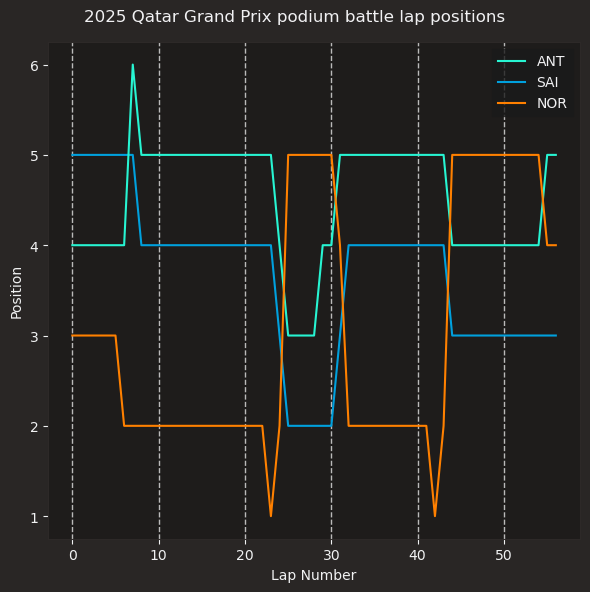

In [46]:
from matplotlib.ticker import MultipleLocator


my_styles = [
    # style for each first driver
    {'color': 'auto', 'linewidth': 0},
    # style for each second driver
    {'color': 'auto', 'linewidth': 0}
]
fig, ax = plt.subplots(figsize=(6, 6))

for driver in ('SAI', 'ANT', 'NOR'):
    laps = race.laps.pick_drivers(driver).reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color'],
                                      session=race)
    ax.plot(laps['Position'], **style, label=driver)
plt.gca().yaxis.set_major_locator(MultipleLocator(1))
ax.set_xlabel("Lap Number")
ax.set_ylabel("Position")

plt.suptitle("2025 Qatar Grand Prix podium battle lap positions")

# Turn on major grid lines
plt.grid(color='w', which='major', axis='x', linestyle='--', linewidth=1, alpha=0.7)
#sns.despine(left=True, bottom=True)
plotting.add_sorted_driver_legend(ax, race)
plt.tight_layout()
plt.show()